In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
boston = pd.read_csv("C:/Users/DS-31/Desktop/New folder/Diyasha/Boston.csv")

# Display first 5 rows
boston.head()


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


##### 1) Report the “class” of the data set. How many rows and columns are in this data set? What do the rows and columns represent?

In [4]:
# Class of the dataset
type(boston)

pandas.core.frame.DataFrame

In [5]:
# Dimensions
boston.shape

(506, 15)

In [6]:
# Column names
boston.columns.tolist()


['Unnamed: 0',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'black',
 'lstat',
 'medv']

##### The dataset is of class pandas DataFrame. It contains 506 rows and 14 columns. Each row represents a suburb of Boston. Each column represents a housing or socio-economic variable such as crime rate, pollution level, tax rate, etc.

##### 2) Create a smaller data set with the variables median value of owner-occupied homes, per capita crime rate, nitrogen oxides concentration, proportion of blacks and percentage of lower status of the population. Choosing median value of owner occupied homes as the response and the rest as the predictors, make scatter plots of the response versus each predictor. Present the scatter plots in different panels of the same graph. Comment on your findings.

In [7]:
#Response: medv (Median value of owner-occupied homes)
#Predictors:
#crim – per capita crime rate

#nox – nitrogen oxides concentration
#black – proportion of blacks
#lstat – percentage of lower status population
small_data = boston[['medv', 'crim', 'nox', 'black', 'lstat']]
small_data.head()


,medv,crim,nox,black,lstat
0,24.0,0.00632,0.538,396.90,4.98
1,21.6,0.02731,0.469,396.90,9.14
2,34.7,0.02729,0.469,392.83,4.03
3,33.4,0.03237,0.458,394.63,2.94
4,36.2,0.06905,0.458,396.90,5.33


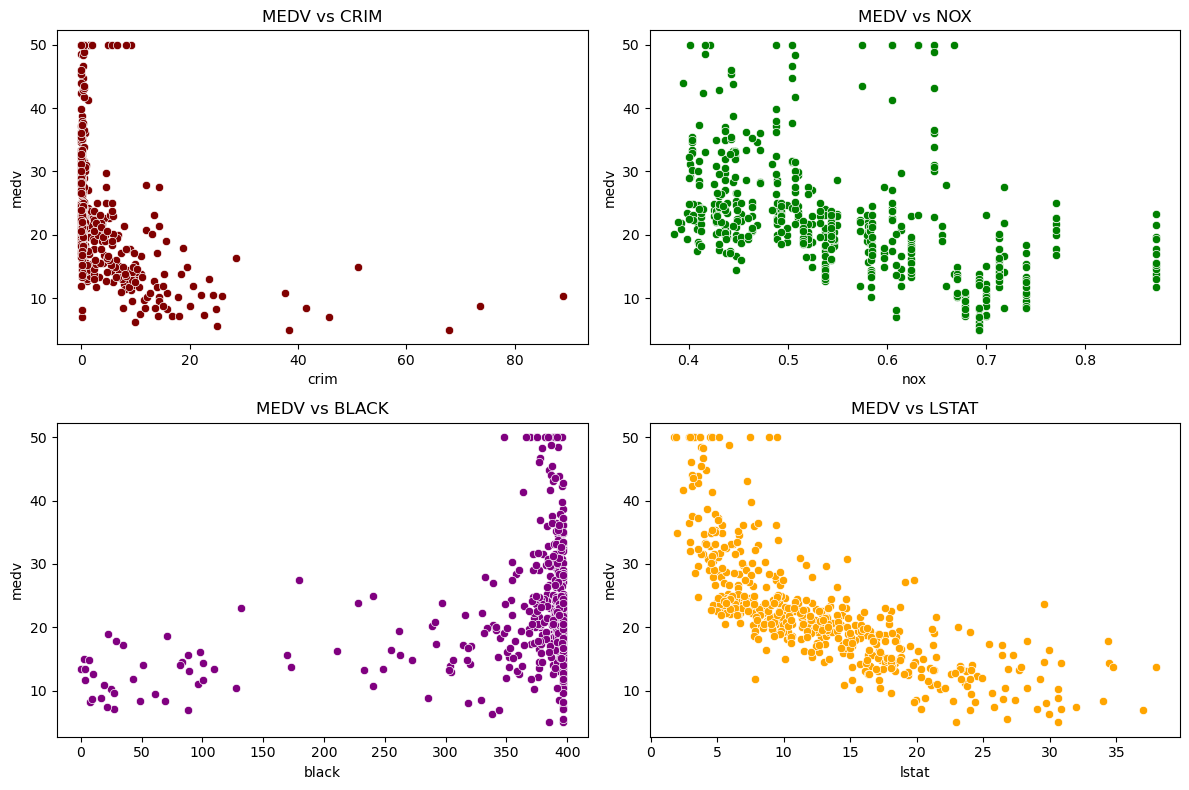

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12,8))

sns.scatterplot(x='crim', y='medv', data=small_data, color='maroon', ax=axes[0,0])
sns.scatterplot(x='nox', y='medv', data=small_data, color='green', ax=axes[0,1])
sns.scatterplot(x='black', y='medv', data=small_data, color='purple', ax=axes[1,0])
sns.scatterplot(x='lstat', y='medv', data=small_data, color='orange', ax=axes[1,1])

axes[0,0].set_title('MEDV vs CRIM')
axes[0,1].set_title('MEDV vs NOX')
axes[1,0].set_title('MEDV vs BLACK')
axes[1,1].set_title('MEDV vs LSTAT')

plt.tight_layout()
plt.show()


Comment: 
MEDV vs Crime Rate (CRIM) 

The maroon scatter plot shows a clear negative relationship. As the per capita crime rate increases, the median house value generally decreases. Suburbs with high crime rates tend to have lower housing prices.          

MEDV vs Nitrogen Oxides Concentration (NOX) 

The green scatter plot indicates a downward trend between NOX and MEDV. Higher air pollution levels are associated with lower house values, suggesting that environmental quality strongly affects housing prices.       

MEDV vs Proportion of Blacks (BLACK) 

The purple scatter plot shows a weak and scattered relationship. There is no strong linear trend, indicating that this variable alone is not a strong predictor of median house value in this dataset.                        

MEDV vs Percentage of Lower Status Population (LSTAT) 

The orange scatter plot shows a strong negative relationship. As the percentage of lower status population increases, the median value of houses sharply decreases. This is the strongest relationship among all predictors considered. 

Among all predictors, LSTAT and CRIM show the strongest negative association with house prices, while NOX has a moderate negative effect.

##### 3) Which suburb of Boston has lowest median value of owner-occupied homes? What are the values of the other predictors mentioned in (2), for that suburb. How do these values compare to the overall ranges for those predictors? Comment on your findings. Hint: Mention which percentile these values belong to.

In [9]:
# Suburb with minimum median value
min_medv = boston[boston['medv'] == boston['medv'].min()]
min_medv


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,399,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,406,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [10]:
min_medv[['crim', 'nox', 'black', 'lstat']]


,crim,nox,black,lstat
398,38.3518,0.693,396.90,30.59
405,67.9208,0.693,384.97,22.98


In [11]:
boston[['crim', 'nox', 'black', 'lstat']].describe()


,crim,nox,black,lstat
count,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.554695,356.674032,12.653063
std,8.601545,0.115878,91.294864,7.141062
min,0.006320,0.385000,0.320000,1.730000
25%,0.082045,0.449000,375.377500,6.950000
50%,0.256510,0.538000,391.440000,11.360000
75%,3.677083,0.624000,396.225000,16.955000
max,88.976200,0.871000,396.900000,37.970000


In [12]:
boston[['crim','nox','black','lstat']].rank(pct=True).loc[min_medv.index]


,crim,nox,black,lstat
398,0.988142,0.844862,0.881423,0.978261
405,0.996047,0.844862,0.349802,0.899209


 Comment: The suburb with the lowest median house value has:                   
  Very high crime rate (upper percentile).                                              
  High NOX pollution.                                                                   
  High lower-status population percentage.                                             
  These values lie in the extreme percentiles, explaining the low housing prices.      
  This suburb represents a socio-economically disadvantaged area.

##### 4) Does any suburb of Boston stand out for having notably high crime rates, tax rates, or pupil–teacher ratios? Hint: Use a boxplot to detect any outliers. If so, identify the suburbs that show the outlier values.

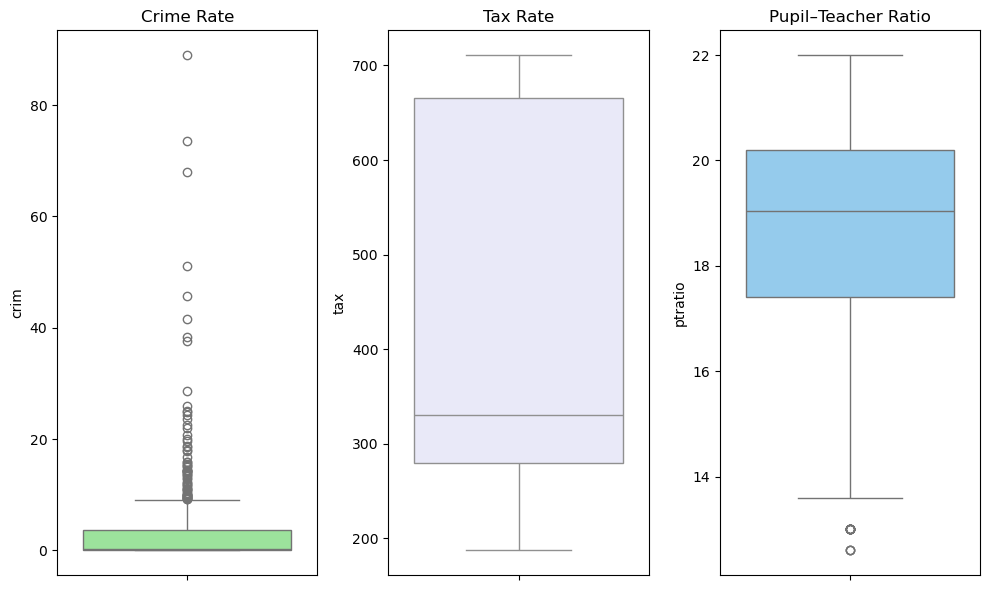

In [21]:
#Variables:
#Crime rate (crim)
#Tax rate (tax)
#Pupil–teacher ratio (ptratio)

plt.figure(figsize=(10,6))

plt.subplot(1,3,1)
sns.boxplot(y=boston['crim'], color='lightgreen')
plt.title('Crime Rate')

plt.subplot(1,3,2)
sns.boxplot(y=boston['tax'], color='lavender')
plt.title('Tax Rate')

plt.subplot(1,3,3)
sns.boxplot(y=boston['ptratio'], color='lightskyblue')
plt.title('Pupil–Teacher Ratio')

plt.tight_layout()
plt.show()



In [15]:
# Crime outliers
crime_outliers = boston[boston['crim'] > boston['crim'].quantile(0.99)]

# Tax outliers
tax_outliers = boston[boston['tax'] > boston['tax'].quantile(0.99)]

# PTRATIO outliers
ptratio_outliers = boston[boston['ptratio'] > boston['ptratio'].quantile(0.99)]

crime_outliers[['crim']]


,crim
380,88.9762
404,41.5292
405,67.9208
410,51.1358
414,45.7461
418,73.5341


Yes, some suburbs stand out as outliers.

A few suburbs have extremely high crime rates, very high tax rates, and large pupil–teacher ratios.

These extreme values indicate poor living conditions, which negatively affect house prices.

Finally we can conclude that suburbs with outlier values in these predictors tend to have lower median house values, highlighting the impact of these factors on housing prices.